### Imports

In [178]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

### Dataset

In [134]:
df= pd.read_csv('D:/Codes/Predictive Analysis/Module 3/house-prices-advanced-regression-techniques/train.csv')

In [135]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [137]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [138]:
# Get all numeric columns
num_cols = df._get_numeric_data().columns.values.tolist()
cat_cols = [col for col in list(df.columns) if col not in num_cols]

In [139]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Preprocessing

#### Null values

In [142]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: xlabel='LotFrontage'>

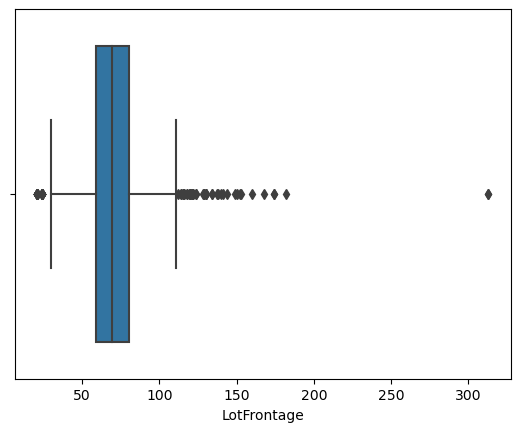

In [143]:
sns.boxplot(x= df['LotFrontage'])

<Axes: xlabel='MasVnrArea'>

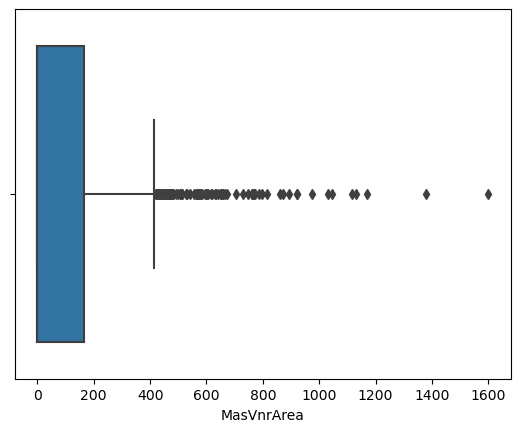

In [144]:
sns.boxplot(x= df['MasVnrArea'])

<Axes: xlabel='GarageYrBlt'>

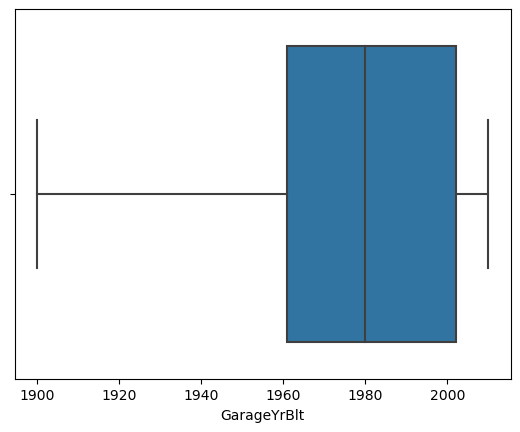

In [145]:
sns.boxplot(x= df['GarageYrBlt'])

In [146]:
# Fillna

In [147]:
df['LotFrontage'].fillna(df['LotFrontage'].mode(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mode(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode(), inplace=True)

<Axes: xlabel='LotFrontage'>

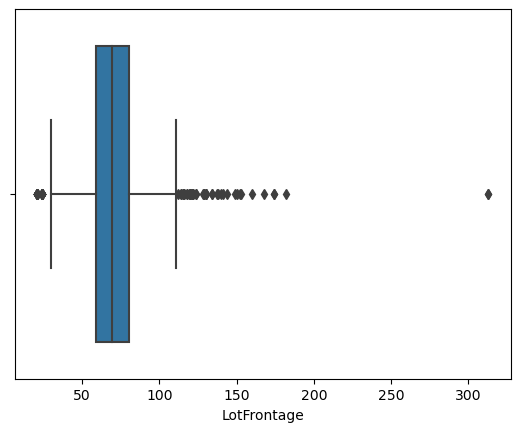

In [148]:
sns.boxplot(x=df['LotFrontage'])

<Axes: xlabel='MasVnrArea'>

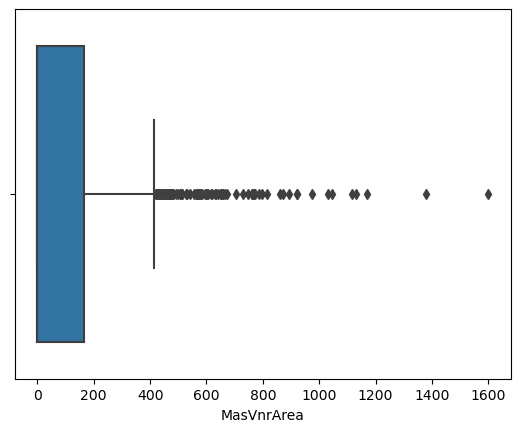

In [149]:
sns.boxplot(x=df['MasVnrArea'])

<Axes: xlabel='GarageYrBlt'>

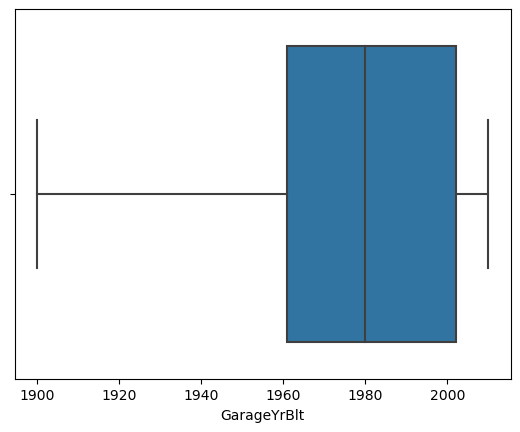

In [150]:
sns.boxplot(x=df['GarageYrBlt'])

#####  Log transformation

In [152]:
df['MasVnrArea'] = np.log(df['MasVnrArea'])

c:\Users\Msc 2\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [153]:
df['MasVnrArea'] = df['MasVnrArea'].replace(-np.inf, 0)

<Axes: xlabel='MasVnrArea'>

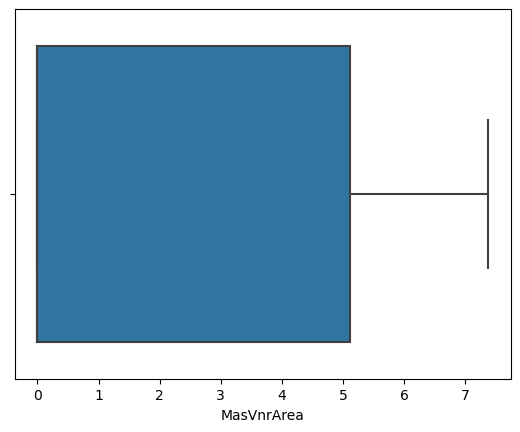

In [154]:
sns.boxplot(x=df['MasVnrArea'])

In [155]:
df['LotFrontage'] = np.log(df['LotFrontage'])

<Axes: xlabel='LotFrontage'>

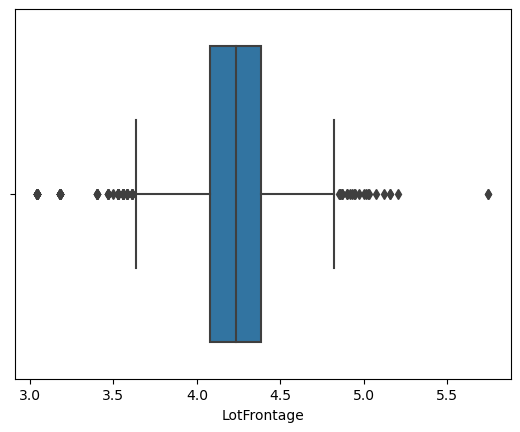

In [156]:
sns.boxplot(x=df['LotFrontage'])

In [157]:
df['GarageYrBlt'] = np.log(df['GarageYrBlt'])

<Axes: xlabel='GarageYrBlt'>

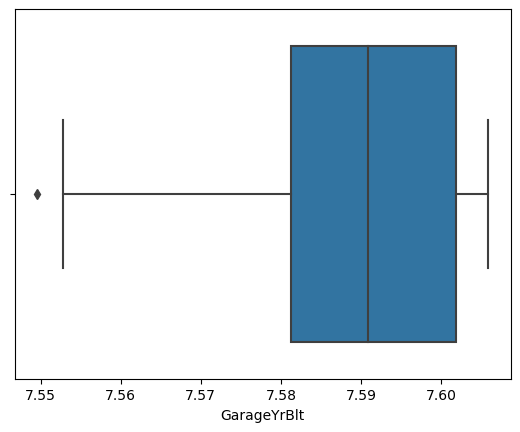

In [158]:
sns.boxplot(x=df['GarageYrBlt'])

##### Dropping columns that have many missing values

In [160]:
df = df.drop(['Alley', 'PoolQC','Fence','MiscFeature'], axis= 1)

for i in ['Alley', 'PoolQC','Fence','MiscFeature']:
    cat_cols.remove(i)

##### Filling Null Values

In [162]:
for i in list(df.columns):
    df[i].fillna(df[i].mode()[0], inplace=True)

In [163]:
df.isnull().sum().sum()

0

In [164]:
df[cat_cols].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

#### Label Encoding

In [166]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for i in ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition']:
    df[i]= le.fit_transform(df[i])

In [168]:
df_encoded= pd.get_dummies(df)

In [169]:
pd.get_dummies(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Functional_Typ,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,3,4.174387,8450,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
1,2,20,3,4.382027,9600,1,3,3,0,2,...,1,0,0,0,0,0,0,0,0,1
2,3,60,3,4.219508,11250,1,0,3,0,4,...,1,0,0,0,0,0,0,0,0,1
3,4,70,3,4.094345,9550,1,0,3,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,60,3,4.430817,14260,1,0,3,0,2,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,7917,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
1456,1457,20,3,4.442651,13175,1,3,3,0,4,...,0,0,0,0,0,0,0,0,0,1
1457,1458,70,3,4.189655,9042,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
1458,1459,20,3,4.219508,9717,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1


In [170]:
df_encoded

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Functional_Typ,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,3,4.174387,8450,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
1,2,20,3,4.382027,9600,1,3,3,0,2,...,1,0,0,0,0,0,0,0,0,1
2,3,60,3,4.219508,11250,1,0,3,0,4,...,1,0,0,0,0,0,0,0,0,1
3,4,70,3,4.094345,9550,1,0,3,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,60,3,4.430817,14260,1,0,3,0,2,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,7917,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
1456,1457,20,3,4.442651,13175,1,3,3,0,4,...,0,0,0,0,0,0,0,0,0,1
1457,1458,70,3,4.189655,9042,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
1458,1459,20,3,4.219508,9717,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1


In [171]:
result = [x for x in list(df.columns) if x not in list(df_encoded.columns)]

result

['Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'SaleType']

In [174]:
y= df_encoded['SalePrice']
X= df_encoded.drop('SalePrice', axis= 1)

##### Normalizing the numeircal columns

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols]) 

### Implement the 5 regression models and compute the MSE

In [179]:
def get_metrics(y_test, y_pred):

  print(f"Mean Absoulute error      : {metrics.mean_absolute_error(y_test,y_pred)}")
  print(f"Mean Squared error        : {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"Root Mean Square error    : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
  print(f"R2 score                  : {metrics.r2_score(y_test,y_pred)}")

#### Splitting data

In [181]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 9)

### Linear Regression

In [206]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)

# plt.scatter(X, y, label="Original Data")

# # plt.plot(X_test, y_pred, color='red', label="Regression Line")

# plt.xlabel("X")
# plt.ylabel("y")
# plt.legend()

# plt.show()

In [207]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 21400.352235098322
Mean Squared error        : 2096022107.0576704
Root Mean Square error    : 45782.33400622636
R2 score                  : 0.6762022798578688


### Polynomial regression

In [210]:
from sklearn.preprocessing import PolynomialFeatures

# Fit polynomial regression model
poly = PolynomialFeatures(degree=1) # set degree of polynomial
X_poly_train = poly.fit_transform(X_train) # create polynomial features
poly_reg = LinearRegression() # create linear regression model
poly_reg.fit(X_poly_train, y_train) # fit model on polynomial features

X_poly_test= poly.fit_transform(X_test)
# Make predictions
y_pred = poly_reg.predict(X_poly_test)

In [211]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 21400.35223511024
Mean Squared error        : 2096022107.0597904
Root Mean Square error    : 45782.33400624951
R2 score                  : 0.6762022798575413


### Decision Tree Regressor

In [213]:
from sklearn.tree import DecisionTreeRegressor

# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5) # Set max_depth to avoid overfitting
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

In [214]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 25321.306872585432
Mean Squared error        : 1290830100.0128038
Root Mean Square error    : 35928.12408146025
R2 score                  : 0.8005899641670693


### Random Forest

In [216]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

In [217]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 17304.30429460581
Mean Squared error        : 914528099.5190022
Root Mean Square error    : 30241.165644184453
R2 score                  : 0.8587218557318291


### 5) Specific to Random Forest Algorithm -
##### a. Find the importance of each of the features and visualize them
##### b. Build a new model by only taking the most important metrics
##### c. Compare the results of both the models

In [220]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 0.14549983737615438
Feature 1: 5.969843784473013
Feature 2: 14.257116706511997
Feature 3: 114.98824504993269
Feature 4: 68.15256796933
Feature 5: 1.7971516722364231
Feature 6: 70.0271818767139
Feature 7: 0.9319467953131307
Feature 8: 0.30956913134716757
Feature 9: 5.8588832242999125
Feature 10: 1.4743689246896572
Feature 11: 8.396843173724235
Feature 12: 1577.6252786121645
Feature 13: 0.8314947051098968
Feature 14: 357.2222470597821
Feature 15: 352.69343862703465
Feature 16: 59.31215462231686
Feature 17: 1.510814459326075
Feature 18: 218.30876958406702
Feature 19: 580.8756294228222
Feature 20: 14.814097800025293
Feature 21: 156.0631275667828
Feature 22: 605.0683875128724
Feature 23: 1.7769073632630774
Feature 24: 73.25821524935743
Feature 25: 10.31676945344248
Feature 26: 187.99425616234583
Feature 27: 3.7427003523304543
Feature 28: 0.623457111035385
Feature 29: 42.292657394498306
Feature 30: 635.4243794712432
Feature 31: 7.316555891574037
Feature 32: 183.06953418369116
Feat

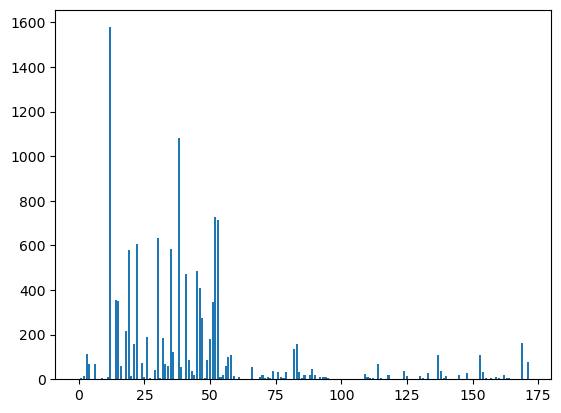

In [222]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print(f'Feature {i}: {fs.scores_[i]}')

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [231]:
index1 = []

for i in range(len(fs.scores_)):
  if(fs.scores_[i]>=200):
    index1.append(i)

index1.append(len(list(df_encoded.columns))-1)   # we are including the normlaized target column also 
index1

[12, 14, 15, 18, 19, 22, 30, 35, 38, 41, 45, 46, 47, 51, 52, 53, 172]

In [225]:
# b. Building a new dataframe from important columns and applying Random Forest Algorithm

In [233]:
# Now our feature selected dataframe is ready
fit_df = df_encoded.iloc[:,index1]
fit_df

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,SaleType_WD
0,0.651479,1.050994,0.878668,1.204192,2,2,-0.459303,-0.793434,0.370333,0.789741,2,0.912210,-0.951226,1,0.311725,0.351000,1
1,-0.071836,0.156734,-0.429577,-0.805930,3,2,0.466465,0.257140,-0.482512,0.789741,3,-0.318683,0.600495,1,0.311725,-0.060731,1
2,0.651479,0.984752,0.830215,1.131635,2,2,-0.313369,-0.627826,0.515013,0.789741,2,-0.318683,0.600495,1,0.311725,0.631726,1
3,0.651479,-1.863632,-0.720298,-0.805930,3,3,-0.687324,-0.521734,0.383659,-1.026041,2,0.296763,0.600495,2,1.650307,0.790804,1
4,1.374795,0.951632,0.733308,1.425011,2,2,0.199680,-0.045611,1.299326,0.789741,2,1.527656,0.600495,1,1.650307,1.698485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.805930,3,2,-0.238122,-0.542435,0.250402,0.789741,3,0.296763,0.600495,1,0.311725,-0.060731,1
1456,-0.071836,0.222975,0.151865,1.014156,3,2,1.104925,2.355701,1.061367,0.789741,3,0.296763,2.152216,2,0.311725,0.126420,1
1457,0.651479,-1.002492,1.024029,-0.805930,0,3,0.215641,0.065656,1.569647,0.789741,2,1.527656,2.152216,1,-1.026858,-1.033914,1
1458,-0.795151,-0.704406,0.539493,-0.805930,3,3,0.046905,-0.218982,-0.832788,-1.026041,2,-0.934130,-0.951226,2,-1.026858,-1.090059,1


In [234]:
from sklearn.ensemble import RandomForestRegressor

# Load the dataset

# Splitting the data into training and testing sets
X = fit_df.iloc[:, 0:-1].values
y = fit_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=9)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

In [235]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 0.16320205479452055
Mean Squared error        : 0.09770804794520548
Root Mean Square error    : 0.3125828657255632
R2 score                  : 0.1986168386119327
